In [1]:
import math
import pandas as pd
import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [20]:
def combine_and_plot_ez(data_dir, component, slice_names):
    """
    Sum spectra from multiple Ez in-plane slices and plot the result with individual curves.
    """
    component_dir = Path(data_dir)
    spectra_list = []
    eV_values = None

    # Read each slice CSV
    for slice_name in slice_names:
        filename = f"{component}_DFT_in_plane_slice{slice_name}_spectrum.csv"
        # filename = f"DFT_in_plane_{slice_name}_{component}_spectrum.csv"
        filepath = component_dir / filename

        if not filepath.exists():
            raise FileNotFoundError(f"Missing: {filepath}")

        # Use correct separator and handle column names
        df = pd.read_csv(filepath, sep=',')  # <---- changed here

        # Make sure columns are named consistently
        if df.columns[0] != 'eV' or df.columns[1] != 'spectrum':
            df.columns = ['eV', 'spectrum']

        if eV_values is None:
            eV_values = df['eV'].values

        spectra_list.append(df['spectrum'].values)

    # Stack and sum/average
    spectra_array = np.vstack(spectra_list)
    summed_spectrum = np.sum(spectra_array, axis=0)
    avg_spectrum = np.mean(spectra_array, axis=0)  # if needed

    # Create result DataFrame
    result_df = pd.DataFrame({
        'eV': eV_values,
        'spectrum': summed_spectrum * (1/len(slice_names))  # 0.2 * sum of 5
    })

    # Save to CSV
    output_filename = f"{component}_DFT_in_plane_sumofFive_spectrum.csv"  # spectrum added
    output_path = component_dir / output_filename
    result_df.to_csv(output_path, index=False)
    print(f"✅ Saved summed spectrum to: {output_path}")

    # --- Plotting with Plotly ---
    fig = go.Figure()

    # Plot individual slices
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    for idx, slice_name in enumerate(slice_names):
        filepath = component_dir / f"{component}_DFT_in_plane_slice{slice_name}_spectrum.csv"
        # filepath = component_dir / f"DFT_in_plane_slice{slice_name}_{component}_spectrum.csv"
        df = pd.read_csv(filepath, sep=',')
        if df.columns[0] != 'eV' or df.columns[1] != 'spectrum':
            df.columns = ['eV', 'spectrum']

        fig.add_trace(go.Scatter(
            x=df['eV'], y=df['spectrum'],
            mode='lines',
            name=f'slice {slice_name}',
            line=dict(color=colors[idx % len(colors)], width=1.5)
        ))

    # Plot summed spectrum
    fig.add_trace(go.Scatter(
        x=result_df['eV'], y=result_df['spectrum'],
        mode='lines',
        name='sum of five × 0.2',
        line=dict(color='black', width=3, 
                  # dash='dash'
                 )
    ))

    fig.update_layout(
        title=f'{component} in-plane: 5 slices + sum ({data_dir})',
        xaxis_title='Energy (eV)',
        yaxis_title='Spectrum',
        template='plotly_white',
        hovermode='x unified',
        # legend=dict(x=0.02, y=0.98, # top-left position
        #             bgcolor='rgba(255,255,255,0.8)'),
        # legend=dict(x=1, y=0, xanchor='right', yanchor='top', # legend position
                    # bgcolor='rgba(255,255,255,0.8)'), 
        width=600,
        height=600
    )

    # 👇 ADD THESE LINES TO EXPORT TO HTML
    html_filename = f"{component}_DFT_in_plane_sumofFive.html"
    html_output_path = component_dir / html_filename
    fig.write_html(html_output_path)
    print(f"✅ Saved interactive graph to: {html_output_path}")

    fig.show()

✅ Saved summed spectrum to: data_miniMonExL100_edge_time/spectra/Ex_DFT_in_plane_sumofFive_spectrum.csv
✅ Saved interactive graph to: data_miniMonExL100_edge_time/spectra/Ex_DFT_in_plane_sumofFive.html


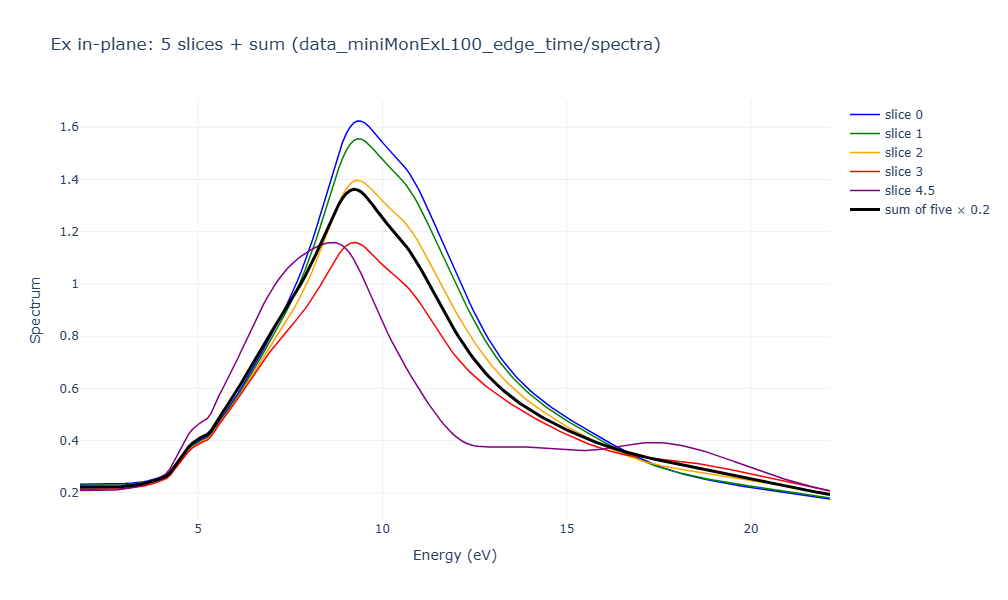

✅ Saved summed spectrum to: data_miniMonExL100_edge_time/spectra/Ey_DFT_in_plane_sumofFive_spectrum.csv
✅ Saved interactive graph to: data_miniMonExL100_edge_time/spectra/Ey_DFT_in_plane_sumofFive.html


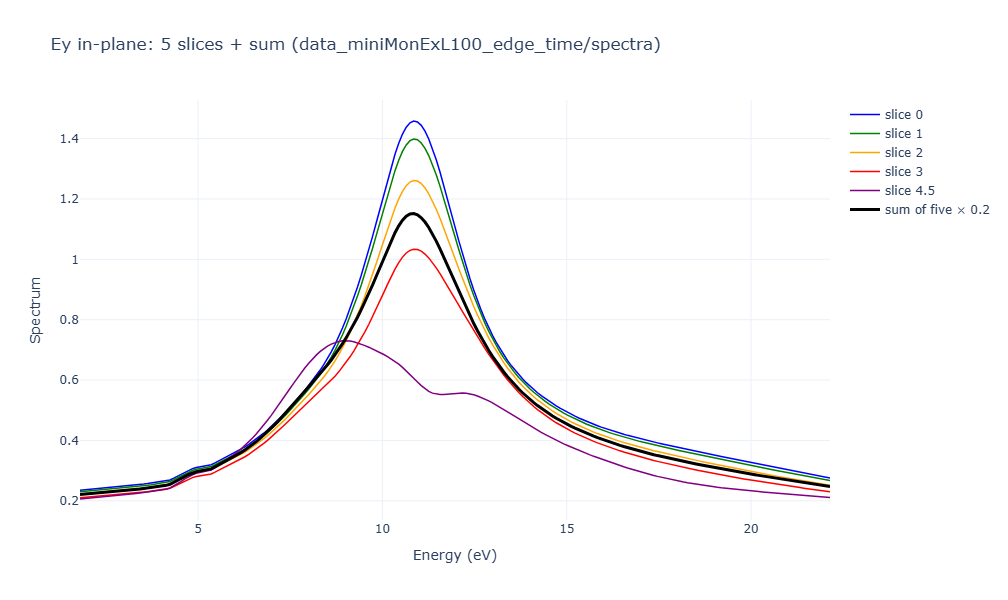

✅ Saved summed spectrum to: data_miniMonExL100_edge_time/spectra/Ez_DFT_in_plane_sumofFive_spectrum.csv
✅ Saved interactive graph to: data_miniMonExL100_edge_time/spectra/Ez_DFT_in_plane_sumofFive.html


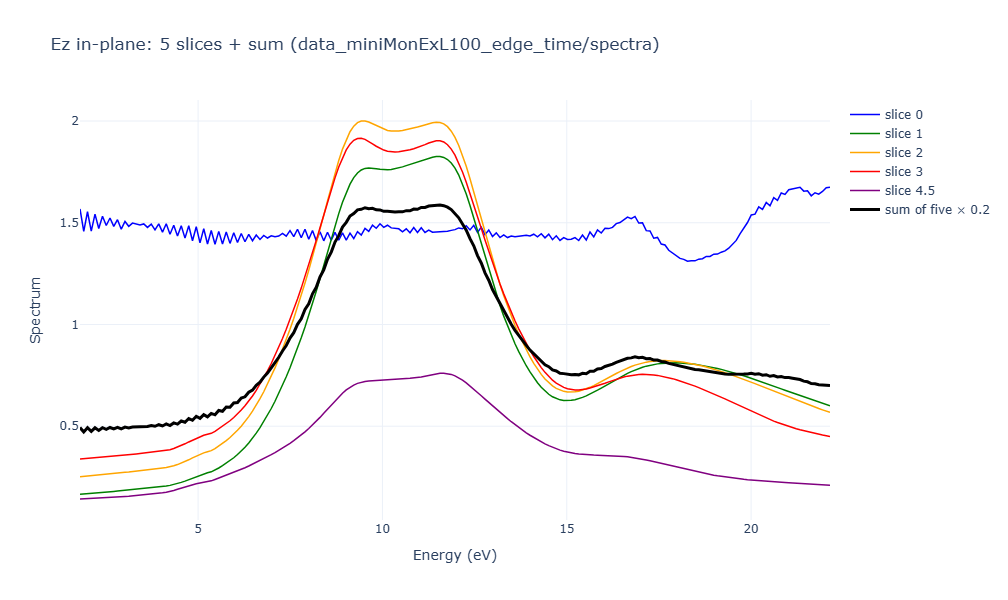

In [21]:
# Example usage
data_dir = 'data_miniMonExL100_edge_time/spectra'
slice_names=['0', '1', '2', '3', '4.5']
combine_and_plot_ez(data_dir,'Ex',slice_names)
combine_and_plot_ez(data_dir,'Ey',slice_names)
combine_and_plot_ez(data_dir,'Ez',slice_names)